In [37]:
#Resume Phrase Matcher code
#importing all required libraries
import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

In [59]:
#Function to read resumes from the folder one by one
mypath='C:/Users/mncedisi.mncwabe/Documents/My Documents/My Documents/resume/' #enter your path here where you saved the resumes
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

def pdfextract(file):
    fileReader = PyPDF2.PdfFileReader(open(file,'rb'))
    countpage = fileReader.getNumPages()
    count = 0
    text = []
    while count < countpage:    
        pageObj = fileReader.getPage(count)
        count +=1
        t = pageObj.extractText()
        print (t)
        text.append(t)
    return text

In [64]:
#function that does phrase matching and builds a candidate profile
def create_profile(file):
    text = pdfextract(file) 
    text = str(text)
    text = text.replace("\\n", "")
    text = text.lower()
    #below is the csv where we have all the keywords
    keyword_dict = pd.read_csv('C:/Users/mncedisi.mncwabe/Downloads/match.csv')
    stats_words = [nlp(text) for text in keyword_dict['Statistics'].dropna(axis = 0)]
    NLP_words = [nlp(text) for text in keyword_dict['NLP'].dropna(axis = 0)]
    ML_words = [nlp(text) for text in keyword_dict['Machine Learning'].dropna(axis = 0)]
    DL_words = [nlp(text) for text in keyword_dict['Deep Learning'].dropna(axis = 0)]
    R_words = [nlp(text) for text in keyword_dict['R Language'].dropna(axis = 0)]
    python_words = [nlp(text) for text in keyword_dict['Python Language'].dropna(axis = 0)]
    Data_Engineering_words = [nlp(text) for text in keyword_dict['Data Engineering'].dropna(axis = 0)]

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats_words)
    matcher.add('NLP', None, *NLP_words)
    matcher.add('ML', None, *ML_words)
    matcher.add('DL', None, *DL_words)
    matcher.add('R', None, *R_words)
    matcher.add('Python', None, *python_words)
    matcher.add('DE', None, *Data_Engineering_words)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
       
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)

In [65]:
#code to execute/call the above functions

final_database=pd.DataFrame()
i = 0 
while i < len(onlyfiles):
    file = onlyfiles[i]
    dat = create_profile(file)
    final_database = final_database.append(dat)
    i +=1
    print(final_database)

 
 
 
 
NND IVH ISENI  KEITH  RA MUN ENYIW A
 
 
D a t a  a n a l y s
t
 
CON TACT
 
PHON E:
 
0 63 43 31 6 81
 
 
ID  N O: 
94 11 17 04 8 50 80
 
 
N AT IONA LITY : 
Sou t h Af r ic an
 
 
EM A IL:
nd ivhi@g ma il.com
 
 
HOM E A DD R ESS: 
1 2 Ou pa Mphe t h a st r
 
Tshe pisong  Phase 6
 
R oode poor t
 
1 7 24
 
CERTIFICA TION
 
M icrosoft  cert ificat ion
 
2
021: 
A zu re  
fu n dame n t als,Pow e r  BI  
( Dat a an alyst A ssoc iat e)
 
Py t hon (
U
d emy )
 
2022
: 
Pyt h on +  SQL +  T ableau : 
In t eg r at in g  Pyth on,  SQL , and T ableau
 
M icrosoft  Excel 
( Ud emy )
 
2022:
 
A dv an c e d Exce l For mu las &  
Fu n c t ions, Dat av isu alizat ions
.
 
 
TOOLS  
 
PY THON , JUPY TER
,
 
MICR OSOFT A ZUR E POWER BI, TA BL EA U 
MS OFFICE, GOO GL E D A TA  
 
 
STUDIO SQL  SER V ER , MY SQL , 
POSTGR ES QL , SSMS
, A MPL ITUDE
 
 
TEM and SEM mic r osc opy, UV
-
v is 
spe c t r osc opy, Ph ot olu min e sc e
n ce  
spe c t r osc opy, Pow de r X
-
r ay dif f r act ion, 
TP

In [66]:
final_database

,Candidate Name,Subject,Keyword,Count
0,keith,R,r,33
1,keith,DE,sql,4
0,keletso,R,r,37
1,keletso,DE,sql,2
0,mncedisi,R,r,30
1,mncedisi,ML,machine learning,1


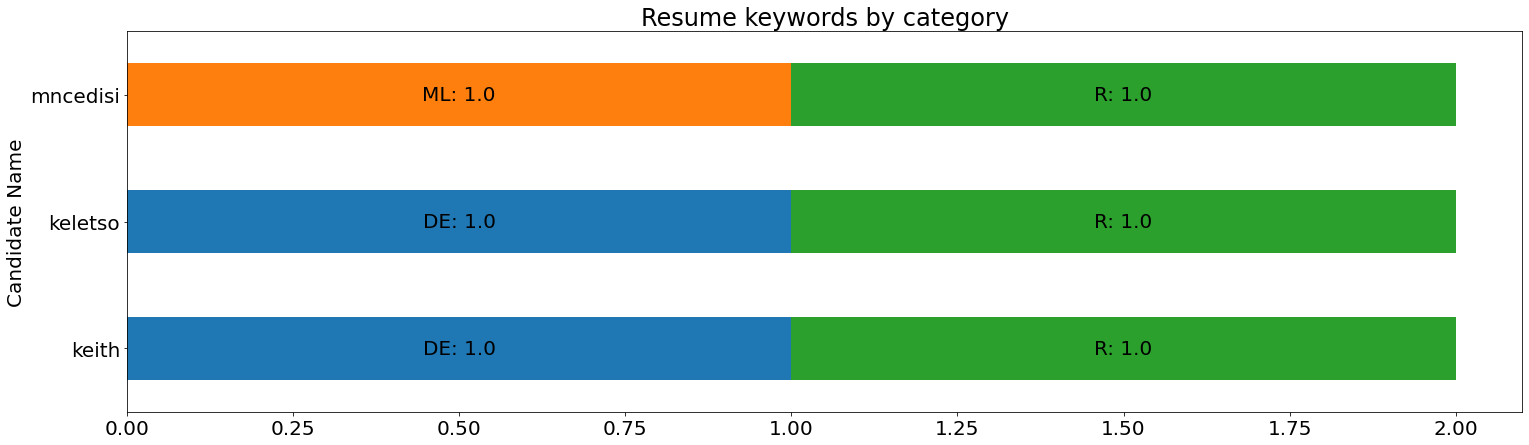

In [62]:
#code to count words under each category and visulaize it through Matplotlib

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']
#execute the below line if you want to see the candidate profile in a csv format
#sample2=new_data.to_csv('sample.csv')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()